In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
import optuna


In [36]:
torch.manual_seed(42)

In [37]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [38]:
training_data=pd.read_csv(r'C:\Users\abhin\Desktop\pytorch,deeplearning,nns\human_activity\train.csv')

In [39]:
testing_data=pd.read_csv(r'C:\Users\abhin\Desktop\pytorch,deeplearning,nns\human_activity\test.csv')

In [40]:
training_data.shape

(7352, 563)

In [41]:
testing_data.shape

(2947, 563)

In [42]:
training_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [43]:
testing_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [44]:
training_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [45]:
testing_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [46]:
training_data['Activity'].unique()


array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

<Axes: xlabel='Activity'>

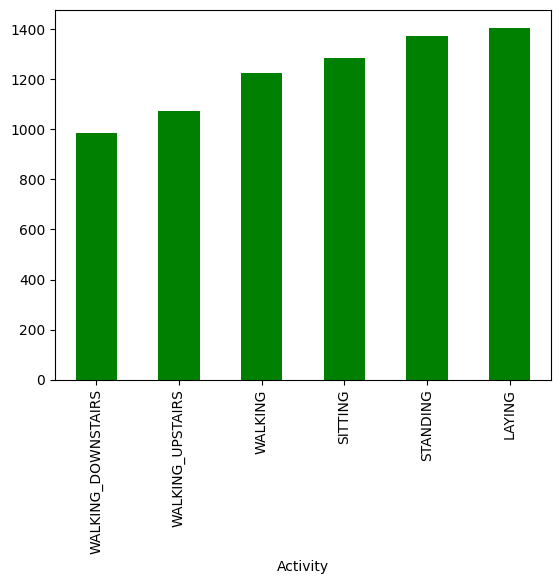

In [47]:
training_data['Activity'].value_counts().sort_values().plot(kind = 'bar', color = 'green')


In [48]:
x_train, y_train = training_data.iloc[:, :-2], training_data.iloc[:, -1:]
x_test, y_test = testing_data.iloc[:, :-2], testing_data.iloc[:, -1:]
x_train.shape, y_train.shape

((7352, 561), (7352, 1))

In [49]:
x_test.shape,y_test.shape

((2947, 561), (2947, 1))

In [50]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
# label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
# print("Recovered Label Mapping:", label_mapping)

c:\Users\abhin\Desktop\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abhin\Desktop\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [51]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape


((2947, 561), (2947,), (7352, 561), (7352,))

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaling_data = MinMaxScaler()
x_train = scaling_data.fit_transform(x_train)
x_test = scaling_data.transform(x_test)

In [53]:
x_train

array([[0.64429225, 0.48985291, 0.43354743, ..., 0.07937662, 0.79825103,
        0.47068654],
       [0.63920942, 0.49179472, 0.4382399 , ..., 0.0776062 , 0.79848665,
        0.47284164],
       [0.63982653, 0.49026642, 0.44326915, ..., 0.07553327, 0.79872236,
        0.47544109],
       ...,
       [0.63669369, 0.49149469, 0.47748909, ..., 0.11043369, 0.84506893,
        0.52040559],
       [0.64482708, 0.49057848, 0.42085971, ..., 0.10740929, 0.84323381,
        0.51266974],
       [0.67575173, 0.49378844, 0.39806642, ..., 0.10836653, 0.84348837,
        0.51834742]])

In [54]:
y_train

array([2, 2, 2, ..., 5, 5, 5])

In [55]:
x_test

array([[0.62858889, 0.48835738, 0.49267312, ..., 0.13999536, 0.86377885,
        0.47101085],
       [0.64301336, 0.49341832, 0.44045874, ..., 0.15095459, 0.86685151,
        0.45805099],
       [0.63774241, 0.48697479, 0.44092416, ..., 0.14861427, 0.86599918,
        0.4603269 ],
       ...,
       [0.67498305, 0.51503872, 0.44210602, ..., 0.17232158, 0.8622078 ,
        0.59059178],
       [0.61879692, 0.50923343, 0.45175053, ..., 0.17014071, 0.85564749,
        0.59378146],
       [0.57681359, 0.49078175, 0.43149077, ..., 0.16995988, 0.85507555,
        0.5940517 ]])

In [56]:
y_test

array([2, 2, 2, ..., 5, 5, 5])

In [57]:
#create customdataset class
class customdataset(Dataset):
    def __init__(self,features,labels):
        self.features=torch.tensor(features,dtype=torch.float32)
        self.labels=torch.tensor(labels,dtype=torch.long)
    def __len__(self):
        return len(self.features)
    def __getitem__(self,idx):
        return self.features[idx],self.labels[idx]

In [58]:
train_dataset=customdataset(x_train,y_train)

In [59]:
test_dataset=customdataset(x_test,y_test)

In [60]:
train_dataset

In [61]:
test_dataset

In [62]:
class MyNN(nn.Module):

  def __init__(self, input_dim, output_dim, num_hidden_layers, neurons_per_layer, dropout_rate, batchnorm_momentum):
    super().__init__()

    layers = []

    # Normalize input features using Layer Normalization
    layers.append(nn.LayerNorm(input_dim))

    for i in range(num_hidden_layers):
      layers.append(nn.Linear(input_dim, neurons_per_layer))
      layers.append(nn.BatchNorm1d(neurons_per_layer, momentum=batchnorm_momentum))  # BatchNorm with tunable momentum
      layers.append(nn.ReLU())
      layers.append(nn.Dropout(dropout_rate))
      input_dim = neurons_per_layer

    layers.append(nn.Linear(neurons_per_layer, output_dim))

    self.model = nn.Sequential(*layers)

  def forward(self, x):
    return self.model(x)


In [63]:
input_dim=x_train.shape[1]

In [64]:
input_dim

561

In [65]:
output_dim=6

using optuna for hyperparameter tunning

In [66]:
def objective(trial):
  num_hidden_layers = trial.suggest_int("num_hidden_layers", 1, 10)
  neurons_per_layer = trial.suggest_int("neurons_per_layer", 8, 256, step=8)
  epochs = trial.suggest_int("epochs", 10, 70, step=10)
  learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
  dropout_rate = trial.suggest_float("dropout_rate", 0.1, 1.0, step=0.1)
  batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128, 256])
  optimizer_name = trial.suggest_categorical("optimizer", ['Adam', 'SGD', 'RMSprop', 'ASGD', 'Adadelta', 'Adafactor', 'Adamax'])
  weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-2, log=True)
  batchnorm_momentum = trial.suggest_float("batchnorm_momentum", 0.01, 0.99)  # New hyperparameter for BatchNorm momentum

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)

  model = MyNN(input_dim, output_dim, num_hidden_layers, neurons_per_layer, dropout_rate, batchnorm_momentum)
  model.to(device)

  # Loss function
  criterion = nn.CrossEntropyLoss()

  if optimizer_name == 'Adam':
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  elif optimizer_name == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  elif optimizer_name == 'RMSprop':
    optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  elif optimizer_name == 'ASGD':
    optimizer = optim.ASGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  elif optimizer_name == 'Adafactor':
    optimizer = optim.Adafactor(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  elif optimizer_name == 'Adamax':
    optimizer = optim.Adamax(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  elif optimizer_name == 'Adadelta':
    optimizer = optim.Adadelta(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

  # Training loop
  for epoch in range(epochs):
    for batch_features, batch_labels in train_loader:
      model.train()
      batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

      # Forward pass
      outputs = model(batch_features)

      # Calculate loss
      loss = criterion(outputs, batch_labels)

      # Backward pass
      optimizer.zero_grad()
      loss.backward()

      # Update weights
      optimizer.step()

  # Evaluation
  model.eval()
  total = 0
  correct = 0

  with torch.no_grad():
    for batch_features, batch_labels in test_loader:
      batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

      outputs = model(batch_features)
      _, predicted = torch.max(outputs, 1)

      total += batch_labels.shape[0]
      correct += (predicted == batch_labels).sum().item()

  accuracy = correct / total

  return accuracy


In [67]:
study = optuna.create_study(direction='maximize')


[I 2025-03-13 15:38:44,929] A new study created in memory with name: no-name-7657804f-9d75-4dd4-824b-eb1d1570c3f8


In [68]:
study.optimize(objective, n_trials = 10)

[I 2025-03-13 15:39:06,212] Trial 0 finished with value: 0.9558873430607397 and parameters: {'num_hidden_layers': 4, 'neurons_per_layer': 232, 'epochs': 30, 'learning_rate': 0.00027502331054039787, 'dropout_rate': 0.7000000000000001, 'batch_size': 256, 'optimizer': 'RMSprop', 'weight_decay': 0.0010455915894162745, 'batchnorm_momentum': 0.9832147603647321}. Best is trial 0 with value: 0.9558873430607397.
[I 2025-03-13 15:39:48,740] Trial 1 finished with value: 0.9626739056667798 and parameters: {'num_hidden_layers': 8, 'neurons_per_layer': 160, 'epochs': 40, 'learning_rate': 0.08872555540908095, 'dropout_rate': 0.2, 'batch_size': 256, 'optimizer': 'Adadelta', 'weight_decay': 0.0013354583980797724, 'batchnorm_momentum': 0.7312090541513578}. Best is trial 1 with value: 0.9626739056667798.
[I 2025-03-13 15:40:16,587] Trial 2 finished with value: 0.9494401085850017 and parameters: {'num_hidden_layers': 1, 'neurons_per_layer': 184, 'epochs': 50, 'learning_rate': 2.7797631632706372e-05, 'drop

In [69]:
study.best_params

{'num_hidden_layers': 8,
 'neurons_per_layer': 160,
 'epochs': 40,
 'learning_rate': 0.08872555540908095,
 'dropout_rate': 0.2,
 'batch_size': 256,
 'optimizer': 'Adadelta',
 'weight_decay': 0.0013354583980797724,
 'batchnorm_momentum': 0.7312090541513578}

In [70]:
study.best_value

0.9626739056667798

In [71]:
study.trials_dataframe()['params_optimizer'].value_counts()

params_optimizer
SGD          4
RMSprop      2
Adadelta     1
Adam         1
ASGD         1
Adafactor    1
Name: count, dtype: int64

In [72]:
study.trials_dataframe().groupby('params_optimizer')['value'].mean()

params_optimizer
ASGD         0.182219
Adadelta     0.962674
Adafactor    0.180523
Adam         0.949440
RMSprop      0.743468
SGD          0.249746
Name: value, dtype: float64

In [73]:
# Creating DataLoader with Tuned Batch Size
from torch.utils.data import DataLoader

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Initialize model with tuned hyperparameters
input_dim = x_train.shape[1]
output_dim = 6

model = MyNN(
    input_dim=input_dim,
    output_dim=output_dim,
    num_hidden_layers=1,
    neurons_per_layer=24,
    dropout_rate=0.2,
    batchnorm_momentum=0.02085
)

# Set optimizer and loss function
optimizer = torch.optim.ASGD(model.parameters(), lr=0.020, weight_decay=6.775009317152503e-05)
criterion = nn.CrossEntropyLoss()

# Training loop
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_features, batch_labels in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")


In [75]:
model.eval()
total, correct = 0, 0
with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)
        _, predicted = torch.max(outputs, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

with torch.no_grad():
    for batch_features, batch_labels in train_loader:
        outputs = model(batch_features)
        _, predicted = torch.max(outputs, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

train_accuracy = correct / total
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

Test Accuracy: 94.88%
Training Accuracy: 98.01%


In [ ]:
import torch

# Save entire model
torch.save(model, "final_ann_model.pth")

# Save only model weights (Recommended)
torch.save(model.state_dict(), "final_ann_model_state.pth")

print("Model saved successfully!")


Model saved successfully!
